First, let's load the data:

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

In [4]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Let's count missing values in both datasets and compare them to the total dataset sizes:

In [21]:
def get_missing(df):
    df = pd.DataFrame(df.isna().sum(), columns=['Missing'])
    return df[df['Missing'] != 0].sort_values('Missing').transpose()

In [41]:
train_missing = get_missing(train)
train_missing

,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,NAME_TYPE_SUITE,...,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,COMMONAREA_MODE,COMMONAREA_AVG,COMMONAREA_MEDI
Missing,1,2,12,278,660,1021,1021,1021,1021,1292,...,210199,210199,210199,210295,213514,213514,213514,214865,214865,214865


In [42]:
train.shape[0]

307511

In [26]:
test_missing = get_missing(test)
test_missing

,EXT_SOURCE_2,AMT_ANNUITY,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,NAME_TYPE_SUITE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,...,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,FONDKAPREMONT_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE
Missing,8,24,29,29,29,29,911,6049,6049,6049,...,32780,32780,32780,32797,33347,33347,33347,33495,33495,33495


In [43]:
test.shape[0]

48744

In [40]:
diff = pd.concat([train_missing, test_missing], axis=1)
diff = merged_df.drop(columns=merged_df.columns[merged_df.columns.duplicated()])
diff

,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS,AMT_GOODS_PRICE
Missing,1,2,278


So, we got the 3 columns that are only in test and they don't seem to differ from the other columns that contain missing data. This means that we can't drop any rows with missing data, as that will prevent us from predicting targets for each row in the testing dataset.

We can handle missing data in a few other ways. For example, we can drop the columns were most values are missing, we can replace missing  values in categorical string data with the string 'XNA', we can replace missing data in numeric columns with the mean or the mean of a few neighbours, and we can add new boolean columns that will indicate whether the data in a column was missing in the original dataset, in case the fact that a datapoint is missing is valuable information for predictions in itself.

We will choose the last method and we won't remove any columns, because the algorithms used in this work (LogisticRegression and RandomForestClassifer) don't get any worse when the input has more dimensions, they will just train for longer, which in this case is affordable.

Now let's write the code that will actually clean up the input dataframe by replacing the missing data, adding new columns and one-hot encoding categorical columns. But before that, let's determine which columns are categorical and which ones are numeric, handle outliers, and thing about encoding categories.

In [57]:
def replace_string_na(df):
    for col in df:
        if df[col].dtype == object:
            df[col] = df[col].fillna('XNA')
            
    return df

train_no_str_na = replace_string_na(train)
test_no_str_na = replace_string_na(test)
            
for col in test:
    if test[col].dtype != object:
        continue
        
    unique_train = sorted(train_no_str_na[col].unique())
    unique_test = sorted(test_no_str_na[col].unique())

    train_not_test = [s for s in unique_train if s not in unique_test]
    if len(train_not_test) > 0:
        print('present in train, but not in test:', train_not_test)

    test_not_train = [s for s in unique_test if s not in unique_train]
    if len(test_not_train) > 0:
        print('present in test, but not in train:', test_not_train)

present in train, but not in test: ['XNA']
present in train, but not in test: ['Maternity leave']
present in train, but not in test: ['Unknown']


So the testing dataset does not contain any string categories that are not present in the training dataset. But we have to ensure that when we one-hot encode categories in train and test, the encodings match in both. For example, the value 'Female' should be encoded the same way for both train and test datasets.

Let's look for categorical numeric columns:

In [58]:
for col in test:
    if test[col].dtype == object:
        continue
        
    unique_train = train[col].unique()
    unique_test = test[col].unique()
    
    unique_count = min([len(unique_train), len(unique_test)])
    if unique_count < 100:
        print(col, train[col].unique())

CNT_CHILDREN [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
REGION_POPULATION_RELATIVE [0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.031329 0.016612 0.010006 0.020713 0.010966
 0.04622  0.025164 0.006296 0.026392 0.018029 0.019101 0.030755 0.008575
 0.01885  0.006207 0.009175 0.007305 0.007114 0.009334 0.022625 0.01452
 0.006629 0.00733  0.032561 0.00496  0.072508 0.009657 0.02461  0.003069
 0.020246 0.018209 0.009549 0.007274 0.002134 0.010276 0.003813 0.003818
 0.00712  0.0105   0.010147 0.010643 0.008866 0.00702  0.002506 0.005313
 0.006233 0.008474 0.005144 0.011657 0.008625 0.014464 0.004849 0.006008
 0.00963  0.005002 0.006852 0.011703 0.006305 0.010556 0.00823  0.006671
 0.002042 0.005084 0.008068 0.001333 0.001417 0.001276 0.000938 0.000533
 0.00029 ]
OWN_CAR_AGE [nan 26. 17.  8. 23.  7. 14.  1.  3. 13. 10.  2. 21. 20. 22. 65.  5. 11.
  9.  4. 15. 12. 25.  6. 64.  0. 27. 19. 28. 18. 16. 30. 36. 24. 39. 29.
 40. 41. 31. 42

All of these are either binary categories, ordinal categories, or just numeric features, so we won't have to worry about them and we can safely treat them as numeric.

Now let's explore numeric columns:

In [79]:
describe_per_column = pd.DataFrame()

rows = []
for col in test:
    if test[col].dtype == object or len(test[col].unique()) == 2:
        continue
        
    rows.append(train[col].describe().transpose())
    
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%g' % x)
pd.DataFrame(rows)b

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511,278181,102790,100002,189146,278202,367142,456255
CNT_CHILDREN,307511,0.417052,0.722121,0,0,0,1,19
AMT_INCOME_TOTAL,307511,168798,237123,25650,112500,147150,202500,1.17e+08
AMT_CREDIT,307511,599026,402491,45000,270000,513531,808650,4.05e+06
AMT_ANNUITY,307499,27108.6,14493.7,1615.5,16524,24903,34596,258026
AMT_GOODS_PRICE,307233,538396,369446,40500,238500,450000,679500,4.05e+06
REGION_POPULATION_RELATIVE,307511,0.0208681,0.0138313,0.00029,0.010006,0.01885,0.028663,0.072508
DAYS_BIRTH,307511,-16037,4363.99,-25229,-19682,-15750,-12413,-7489
DAYS_EMPLOYED,307511,63815,141276,-17912,-2760,-1213,-289,365243
DAYS_REGISTRATION,307511,-4986.12,3522.89,-24672,-7479.5,-4504,-2010,0


The DAYS_EMPLOYED column has an invalid value. Let's look into it:

In [84]:
train['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [85]:
test['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    9274
-1119        32
-389         31
-1240        30
-148         28
Name: count, dtype: int64

The column AMT_REQ_CREDIT_BUREAU_QRT seems to contain 2 significant outliers, and only in the training dataset. We'll replace them with NA too:

In [209]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0      215417
1       33862
2       14412
3        1717
4         476
5          64
6          28
8           7
7           7
261         1
19          1
Name: count, dtype: int64

In [210]:
test['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0    23559
1    15573
2     2998
3      495
4       57
5       11
7        1
6        1
Name: count, dtype: int64

We can replace them with NA and add a new column to indicate whether the value was originally anomalous, which could potentially be useful information for the model.

Now that we have explored the data, let's write a function that will clean up the input data for using as model input:

In [270]:
from sklearn.impute import KNNImputer, SimpleImputer
from tqdm import tqdm

# Initialize encodings to use for both training and testing datasets in the future
encodings = {}
labels_for = {}
count_for = {}
for col in test.columns:
    if test[col].dtype != object:
        continue
        
    unique = sorted(train[col].unique())
    count = len(unique)
    
    labels_for[col] = unique
    count_for[col] = count
    
    encodings_for_col_forward = {}
    encodings_for_col_backward = {}
    for i, label in enumerate(unique):
        # The last column is redundant in one-hot encoding
        if i == count - 1:
            break
            
        encodings_for_col_forward[label] = i
        encodings_for_col_backward[i] = label
    
    encodings[col] = {'forward': encodings_for_col_forward, 'backward': encodings_for_col_backward}

def clean_df(df):
    df = pd.DataFrame(df)
    
    # Handle anomalies
    df['DAYS_EMPLOYES_ANOM'] = df['DAYS_EMPLOYED'] == 365243
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace({365243: np.nan})
    
    df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].replace({261: np.nan, 19: np.nan})
    
    del df['SK_ID_CURR']
    if 'TARGET' in df:
        del df['TARGET']
    
    # Handle missing values, normalization and one-hot encoding
    encoded_categories_dfs = []
    for col in tqdm(df.columns):
        if df[col].dtype == object:
            # Handle missing values
            df[col] = df[col].fillna('XNA')
            
            # One-hot encode
            cols = [(df[col] == pd.Series([labels_for[col][i] for _ in range(df[col].shape[0])])).astype(np.uint8)
                    for i in range(count_for[col] - 1)]
            encoded_categories_dfs.append(pd.concat(cols, axis=1, keys=[col + '=' + label for label in labels_for[col][:-1]]))
            del df[col]
        else:
            # Handle missing values
            if len(df[col].isna()) <= df[col].shape[0] * 0.3:
                df[col] = KNNImputer().fit_transform(df[col].values.reshape(-1, 1))
            else:
                df[col] = SimpleImputer(strategy='median').fit_transform(df[col].values.reshape(-1, 1))
            
            # Normalize
            if len(df[col].unique()) <= 2:
                df[col] = df[col].astype(np.uint8)
            else:
                df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
            
    return pd.concat([df, *encoded_categories_dfs], axis=1)

In [271]:
train_clean = clean_df(train)
train_clean.head()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:05<00:00, 22.56it/s]


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYES_ANOM,NAME_CONTRACT_TYPE=Cash loans,CODE_GENDER=F,CODE_GENDER=M,FLAG_OWN_CAR=N,FLAG_OWN_REALTY=N,NAME_TYPE_SUITE=Children,NAME_TYPE_SUITE=Family,NAME_TYPE_SUITE=Group of people,NAME_TYPE_SUITE=Other_A,NAME_TYPE_SUITE=Other_B,"NAME_TYPE_SUITE=Spouse, partner",NAME_TYPE_SUITE=Unaccompanied,NAME_INCOME_TYPE=Businessman,NAME_INCOME_TYPE=Commercial associate,NAME_INCOME_TYPE=Maternity leave,NAME_INCOME_TYPE=Pensioner,NAME_INCOME_TYPE=State servant,NAME_INCOME_TYPE=Student,NAME_INCOME_TYPE=Unemployed,NAME_EDUCATION_TYPE=Academic degree,NAME_EDUCATION_TYPE=Higher education,NAME_EDUCATION_TYPE=Incomplete higher,NAME_EDUCATION_TYPE=Lower secondary,NAME_FAMILY_STATUS=Civil marriage,NAME_FAMILY_STATUS=Married,NAME_FAMILY_STATUS=Separated,NAME_FAMILY_STATUS=Single / not married,NAME_FAMILY_STATUS=Unknown,NAME_HOUSING_TYPE=Co-op apartment,NAME_HOUSING_TYPE=House / apartment,NAME_HOUSING_TYPE=Municipal apartment,NAME_HOUSING_TYPE=Office apartment,NAME_HOUSING_TYPE=Rented apartment,OCCUPATION_TYPE=Accountants,OCCUPATION_TYPE=Cleaning staff,OCCUPATION_TYPE=Cooking staff,OCCUPATION_TYPE=Core staff,OCCUPATION_TYPE=Drivers,OCCUPATION_TYPE=HR staff,OCCUPATION_TYPE=High skill tech staff,OCCUPATION_TYPE=IT staff,OCCUPATION_TYPE=Laborers,OCCUPATION_TYPE=Low-skill Laborers,OCCUPATION_TYPE=Managers,OCCUPATION_TYPE=Medicine staff,OCCUPATION_TYPE=Private service staff,OCCUPATION_TYPE=Realty agents,OCCUPATION_TYPE=Sales staff,OCCUPATION_TYPE=Secretaries,OCCUPATION_TYPE=Security staff,OCCUPATION_TYPE=Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START=FRIDAY,WEEKDAY_APPR_PROCESS_START=MONDAY,WEEKDAY_APPR_PROCESS_START=SATURDAY,WEEKDAY_APPR_PROCESS_START=SUNDAY,WEEKDAY_APPR_PROCESS_START=THURSDAY,WEEKDAY_APPR_PROCESS_START=TUESDAY,ORGANIZATION_TYPE=Advertising,ORGANIZATION_TYPE=Agriculture,ORGANIZATION_TYPE=Bank,ORGANIZATION_TYPE=Business Entity Type 1,ORGANIZATION_TYPE=Business Entity Type 2,ORGANIZATION_TYPE=Business Entity Type 3,ORGANIZATION_TYPE=Cleaning,ORGANIZATION_TYPE=Construction,ORGANIZATION_TYPE=Culture,ORGANIZATION_TYPE=Electricity,ORGANIZATION_TYPE=Emergency,ORGANIZATION

In [272]:
test_clean = clean_df(test)
test_clean.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 132.71it/s]


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYES_ANOM,NAME_CONTRACT_TYPE=Cash loans,CODE_GENDER=F,CODE_GENDER=M,FLAG_OWN_CAR=N,FLAG_OWN_REALTY=N,NAME_TYPE_SUITE=Children,NAME_TYPE_SUITE=Family,NAME_TYPE_SUITE=Group of people,NAME_TYPE_SUITE=Other_A,NAME_TYPE_SUITE=Other_B,"NAME_TYPE_SUITE=Spouse, partner",NAME_TYPE_SUITE=Unaccompanied,NAME_INCOME_TYPE=Businessman,NAME_INCOME_TYPE=Commercial associate,NAME_INCOME_TYPE=Maternity leave,NAME_INCOME_TYPE=Pensioner,NAME_INCOME_TYPE=State servant,NAME_INCOME_TYPE=Student,NAME_INCOME_TYPE=Unemployed,NAME_EDUCATION_TYPE=Academic degree,NAME_EDUCATION_TYPE=Higher education,NAME_EDUCATION_TYPE=Incomplete higher,NAME_EDUCATION_TYPE=Lower secondary,NAME_FAMILY_STATUS=Civil marriage,NAME_FAMILY_STATUS=Married,NAME_FAMILY_STATUS=Separated,NAME_FAMILY_STATUS=Single / not married,NAME_FAMILY_STATUS=Unknown,NAME_HOUSING_TYPE=Co-op apartment,NAME_HOUSING_TYPE=House / apartment,NAME_HOUSING_TYPE=Municipal apartment,NAME_HOUSING_TYPE=Office apartment,NAME_HOUSING_TYPE=Rented apartment,OCCUPATION_TYPE=Accountants,OCCUPATION_TYPE=Cleaning staff,OCCUPATION_TYPE=Cooking staff,OCCUPATION_TYPE=Core staff,OCCUPATION_TYPE=Drivers,OCCUPATION_TYPE=HR staff,OCCUPATION_TYPE=High skill tech staff,OCCUPATION_TYPE=IT staff,OCCUPATION_TYPE=Laborers,OCCUPATION_TYPE=Low-skill Laborers,OCCUPATION_TYPE=Managers,OCCUPATION_TYPE=Medicine staff,OCCUPATION_TYPE=Private service staff,OCCUPATION_TYPE=Realty agents,OCCUPATION_TYPE=Sales staff,OCCUPATION_TYPE=Secretaries,OCCUPATION_TYPE=Security staff,OCCUPATION_TYPE=Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START=FRIDAY,WEEKDAY_APPR_PROCESS_START=MONDAY,WEEKDAY_APPR_PROCESS_START=SATURDAY,WEEKDAY_APPR_PROCESS_START=SUNDAY,WEEKDAY_APPR_PROCESS_START=THURSDAY,WEEKDAY_APPR_PROCESS_START=TUESDAY,ORGANIZATION_TYPE=Advertising,ORGANIZATION_TYPE=Agriculture,ORGANIZATION_TYPE=Bank,ORGANIZATION_TYPE=Business Entity Type 1,ORGANIZATION_TYPE=Business Entity Type 2,ORGANIZATION_TYPE=Business Entity Type 3,ORGANIZATION_TYPE=Cleaning,ORGANIZATION_TYPE=Construction,ORGANIZATION_TYPE=Culture,ORGANIZATION_TYPE=Electricity,ORGANIZATION_TYPE=Emergency,ORGANIZATION

Let's also add train and test dataset variants that will indicate which filled NA values were originally NA:

In [248]:
def add_missing_indication(df):
    df = pd.DataFrame(df)
    
    new_cols = []
    new_col_names = []
    for col in test:
        if not test[col].isna().any():
            continue
        
        new_cols.append(test[col].isna().astype(np.uint8))
        new_col_names.append(col + ' Missing')
    
    df_for_concat = pd.concat(new_cols, axis=1, keys=new_col_names)
    return pd.concat([df, df_for_concat], axis=1)

In [250]:
train_clean_w_mi = add_missing_indication(train_clean)
train_clean_w_mi.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYES_ANOM,NAME_CONTRACT_TYPE=Cash loans,CODE_GENDER=F,CODE_GENDER=M,FLAG_OWN_CAR=N,FLAG_OWN_REALTY=N,NAME_TYPE_SUITE=Children,NAME_TYPE_SUITE=Family,NAME_TYPE_SUITE=Group of people,NAME_TYPE_SUITE=Other_A,NAME_TYPE_SUITE=Other_B,"NAME_TYPE_SUITE=Spouse, partner",NAME_TYPE_SUITE=Unaccompanied,NAME_INCOME_TYPE=Businessman,NAME_INCOME_TYPE=Commercial associate,NAME_INCOME_TYPE=Maternity leave,NAME_INCOME_TYPE=Pensioner,NAME_INCOME_TYPE=State servant,NAME_INCOME_TYPE=Student,NAME_INCOME_TYPE=Unemployed,NAME_EDUCATION_TYPE=Academic degree,NAME_EDUCATION_TYPE=Higher education,NAME_EDUCATION_TYPE=Incomplete higher,NAME_EDUCATION_TYPE=Lower secondary,NAME_FAMILY_STATUS=Civil marriage,NAME_FAMILY_STATUS=Married,NAME_FAMILY_STATUS=Separated,NAME_FAMILY_STATUS=Single / not married,NAME_FAMILY_STATUS=Unknown,NAME_HOUSING_TYPE=Co-op apartment,NAME_HOUSING_TYPE=House / apartment,NAME_HOUSING_TYPE=Municipal apartment,NAME_HOUSING_TYPE=Office apartment,NAME_HOUSING_TYPE=Rented apartment,OCCUPATION_TYPE=Accountants,OCCUPATION_TYPE=Cleaning staff,OCCUPATION_TYPE=Cooking staff,OCCUPATION_TYPE=Core staff,OCCUPATION_TYPE=Drivers,OCCUPATION_TYPE=HR staff,OCCUPATION_TYPE=High skill tech staff,OCCUPATION_TYPE=IT staff,OCCUPATION_TYPE=Laborers,OCCUPATION_TYPE=Low-skill Laborers,OCCUPATION_TYPE=Managers,OCCUPATION_TYPE=Medicine staff,OCCUPATION_TYPE=Private service staff,OCCUPATION_TYPE=Realty agents,OCCUPATION_TYPE=Sales staff,OCCUPATION_TYPE=Secretaries,OCCUPATION_TYPE=Security staff,OCCUPATION_TYPE=Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START=FRIDAY,WEEKDAY_APPR_PROCESS_START=MONDAY,WEEKDAY_APPR_PROCESS_START=SATURDAY,WEEKDAY_APPR_PROCESS_START=SUNDAY,WEEKDAY_APPR_PROCESS_START=THURSDAY,WEEKDAY_APPR_PROCESS_START=TUESDAY,ORGANIZATION_TYPE=Advertising,ORGANIZATION_TYPE=Agriculture,ORGANIZATION_TYPE=Bank,ORGANIZATION_TYPE=Business Entity Type 1,ORGANIZATION_TYPE=Business Entity Type 2,ORGANIZATION_TYPE=Business Entity Type 3,ORGANIZATION_TYPE=Cleaning,ORGANIZATION_TYPE=Construction,ORGANIZATION_TYPE=Culture,ORGANIZATION_TYPE=Electricity,ORGANIZATION_TYPE=Emergency,ORGANIZATION

In [252]:
test_clean_w_mi = add_missing_indication(test_clean)
test_clean_w_mi.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYES_ANOM,NAME_CONTRACT_TYPE=Cash loans,CODE_GENDER=F,CODE_GENDER=M,FLAG_OWN_CAR=N,FLAG_OWN_REALTY=N,NAME_TYPE_SUITE=Children,NAME_TYPE_SUITE=Family,NAME_TYPE_SUITE=Group of people,NAME_TYPE_SUITE=Other_A,NAME_TYPE_SUITE=Other_B,"NAME_TYPE_SUITE=Spouse, partner",NAME_TYPE_SUITE=Unaccompanied,NAME_INCOME_TYPE=Businessman,NAME_INCOME_TYPE=Commercial associate,NAME_INCOME_TYPE=Maternity leave,NAME_INCOME_TYPE=Pensioner,NAME_INCOME_TYPE=State servant,NAME_INCOME_TYPE=Student,NAME_INCOME_TYPE=Unemployed,NAME_EDUCATION_TYPE=Academic degree,NAME_EDUCATION_TYPE=Higher education,NAME_EDUCATION_TYPE=Incomplete higher,NAME_EDUCATION_TYPE=Lower secondary,NAME_FAMILY_STATUS=Civil marriage,NAME_FAMILY_STATUS=Married,NAME_FAMILY_STATUS=Separated,NAME_FAMILY_STATUS=Single / not married,NAME_FAMILY_STATUS=Unknown,NAME_HOUSING_TYPE=Co-op apartment,NAME_HOUSING_TYPE=House / apartment,NAME_HOUSING_TYPE=Municipal apartment,NAME_HOUSING_TYPE=Office apartment,NAME_HOUSING_TYPE=Rented apartment,OCCUPATION_TYPE=Accountants,OCCUPATION_TYPE=Cleaning staff,OCCUPATION_TYPE=Cooking staff,OCCUPATION_TYPE=Core staff,OCCUPATION_TYPE=Drivers,OCCUPATION_TYPE=HR staff,OCCUPATION_TYPE=High skill tech staff,OCCUPATION_TYPE=IT staff,OCCUPATION_TYPE=Laborers,OCCUPATION_TYPE=Low-skill Laborers,OCCUPATION_TYPE=Managers,OCCUPATION_TYPE=Medicine staff,OCCUPATION_TYPE=Private service staff,OCCUPATION_TYPE=Realty agents,OCCUPATION_TYPE=Sales staff,OCCUPATION_TYPE=Secretaries,OCCUPATION_TYPE=Security staff,OCCUPATION_TYPE=Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START=FRIDAY,WEEKDAY_APPR_PROCESS_START=MONDAY,WEEKDAY_APPR_PROCESS_START=SATURDAY,WEEKDAY_APPR_PROCESS_START=SUNDAY,WEEKDAY_APPR_PROCESS_START=THURSDAY,WEEKDAY_APPR_PROCESS_START=TUESDAY,ORGANIZATION_TYPE=Advertising,ORGANIZATION_TYPE=Agriculture,ORGANIZATION_TYPE=Bank,ORGANIZATION_TYPE=Business Entity Type 1,ORGANIZATION_TYPE=Business Entity Type 2,ORGANIZATION_TYPE=Business Entity Type 3,ORGANIZATION_TYPE=Cleaning,ORGANIZATION_TYPE=Construction,ORGANIZATION_TYPE=Culture,ORGANIZATION_TYPE=Electricity,ORGANIZATION_TYPE=Emergency,ORGANIZATION

Let's move the targets to a separate pandas series:

In [221]:
target = train['TARGET'].astype(np.uint8)

The data is prepared. The last small step we need to take is to write a function that will randomly split the training dataset into train and validation subsets:

In [227]:
def train_val_split(df, target):
    mask = np.random.choice([False, True], df.shape[0], p=[0.8, 0.2])
    return df[~mask], df[mask], target[~mask], target[mask]

Now we have everything prepared to start testing and finding best algorithms and best parameters for the task.

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def round_(num):
    return num if int(num) == num else round(num, 3)

def test_alg(alg, args, weight, missing_indication, results):
    train_data, val_data, train_target, val_target = train_val_split(train_clean, target)
    
    model = alg(**args)
    model.fit(train_data, train_target)
    
    model_name = f'{alg.__name__}(class_weight: {weight})'
    value_counts = np.unique(model.predict(val_data), return_counts=True)[1]
    vc_ratio = round_(value_counts[0] / value_counts[1])
    score = round_(roc_auc_score(val_target, model.predict_proba(val_data)[:, 1]))
    
    results['Model'].append(model_name)
    results['Balance Ratio'].append(vc_ratio)
    results['Missing Indication'].append(missing_indication)
    results['ROC_AUC'].append(score)

results = {'Model': [], 'Balance Ratio': [], 'Missing Indication': [], 'ROC_AUC': []}
for missing_indication in [False, True]:
    test_alg(LogisticRegression, {'n_jobs': -1, 'max_iter': 10000}, 1, missing_indication, results)
    test_alg(RandomForestClassifier, {'n_jobs': -1}, 1, missing_indication, results)

    test_alg(LogisticRegression, {'class_weight': 'balanced','n_jobs': -1, 'max_iter': 10000}, 'balanced', missing_indication, results)
    test_alg(RandomForestClassifier, {'class_weight': 'balanced', 'n_jobs': -1}, 'balanced', missing_indication, results)

    test_alg(RandomForestClassifier, {'class_weight': 'balanced_subsample', 'n_jobs': -1}, 'balanced_subsample', missing_indication, results)

for i in tqdm(range(80)):
    do_logistic = i % 4 in [0, 1]
    missing_indication = i % 4 in [0, 2]
    i = int(i / 4)

    one_weight = round(0.8 + i * 0.01, 2)
    zero_weight = 1 - one_weight

    if do_logistic:
        test_alg(LogisticRegression, {'class_weight': {0: zero_weight, 1: one_weight}, 'n_jobs': -1, 'max_iter': 10000}, 
                 one_weight, missing_indication, results)
    else:
        test_alg(RandomForestClassifier, {'class_weight': {0: zero_weight, 1: one_weight}, 'n_jobs': -1}, 
                 one_weight, missing_indication, results)
                
target_vc = target.value_counts()

print('Reference balance ratio:', round_(target_vc[0] / target_vc[1]))
results_df = pd.DataFrame.from_dict(results)
results_df

Reference balance ratio: 11.387


,Model,Balance Ratio,Missing Indication,ROC_AUC
0,LogisticRegression(class_weight: 1),546.098,False,0.743
1,RandomForestClassifier(class_weight: 1),8849.29,False,0.707
2,LogisticRegression(class_weight: balanced),1.892,False,0.748
3,RandomForestClassifier(class_weight: balanced),2792.41,False,0.72
4,RandomForestClassifier(class_weight: balanced_...,3604.65,False,0.722
5,LogisticRegression(class_weight: 1),571.682,True,0.747
6,RandomForestClassifier(class_weight: 1),7753.38,True,0.712
7,LogisticRegression(class_weight: balanced),1.936,True,0.744
8,RandomForestClassifier(class_weight: balanced),10232.2,True,0.723
9,RandomForestClassifier(class_weight: balanced_...,3851.44,True,0.723


Try running the same tests after adding a column per each column with missing values in the original dataset, which indicates which values were missing and which ones were present. Add a new key 'Missing Indication' to results dict and fill with False. Comment results variable assignment in order to not overwrite it and run the thing again after adding those columns. Then uncomment results variable asignment and maybe adjust the previous code so that it would work the first time with the 'Missing Indication' and all that.

Explore the results_df thing for the best way to find the name of the model with the highest ROC_AUC score.

In [256]:
best_model = results_df.iloc[[results_df['ROC_AUC'].idxmax()]]
best_model

,Model,Balance Ratio,Missing Indication,ROC_AUC
14,LogisticRegression(class_weight: 0.81),10.815,True,0.751


In [276]:
model = LogisticRegression(class_weight={0: 0.19, 1: 0.81}, n_jobs=-1, max_iter=10000)
model.fit(train_clean, target)
preds = pd.Series(model.predict_proba(test_clean)[:, 1])

submission = pd.concat([test['SK_ID_CURR'], preds], axis=1, keys=['SK_ID_CURR', 'TARGET'])
submission.to_csv('submission.csv', index=False)

Here is the result of my submission:

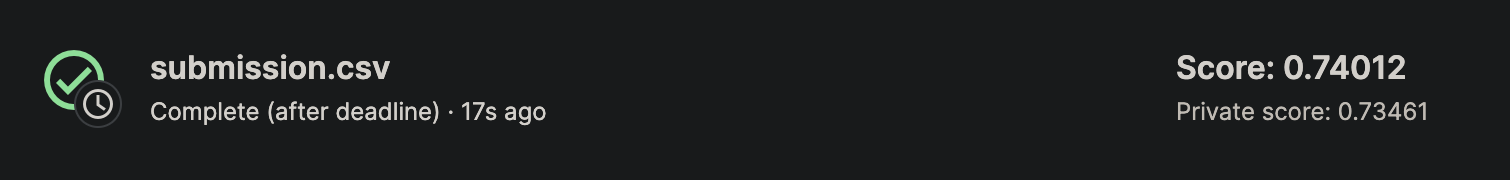